#### Image major color extraction using the clustring algorithm (Kmeans)

<class 'numpy.ndarray'>


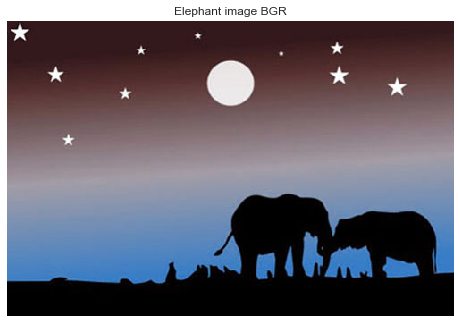

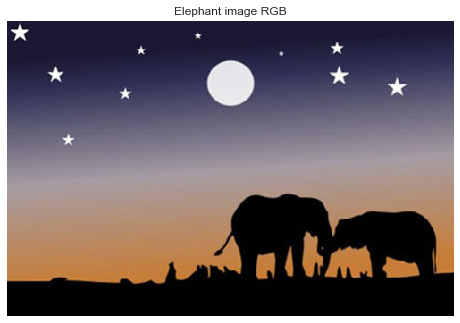

In [58]:
### Get the image
import cv2
img = cv2.imread('elephant.jpg')
img_ = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(type(img))

### Visulize the image
import matplotlib.pyplot as plt

## Image in the BGR
plt.style.use("seaborn")
plt.imshow(img)
plt.axis("off")
plt.title("Elephant image BGR")
plt.show()

### Image in the RGB
plt.style.use("seaborn")
plt.imshow(img_)
plt.axis("off")
plt.title("Elephant image RGB")
plt.show()

In [59]:
### As image is nothing but the group of the points in the frame or array so we make the clusters
from sklearn.cluster import KMeans
num_of_dominant_colors = 4
Km = KMeans(n_clusters = num_of_dominant_colors)

In [60]:
### Data preprocessing
print("Shape of the original image is {}".format(img_.shape))
original = img_.shape
### Transform in the 2d array
newImgShape = img_.reshape((-1,3))
print("Shape of the new image is {}".format(newImgShape.shape))

Shape of the original image is (330, 500, 3)
Shape of the new image is (165000, 3)


In [61]:
## Fitting the array(image)
Km.fit(newImgShape)
labels = Km.labels_
centres = Km.cluster_centers_
print(centres)

[[  1.49597475   0.83632573   1.15406   ]
 [174.77987421 145.24855346 128.25336478]
 [ 98.69372544  94.85285947 117.87183223]
 [ 38.01014671  35.28635682  64.49065646]]


In [62]:
## Making the array of int type
import numpy as np
centre = np.array(centres,dtype='uint8')
print(centre)

[[  1   0   1]
 [174 145 128]
 [ 98  94 117]
 [ 38  35  64]]


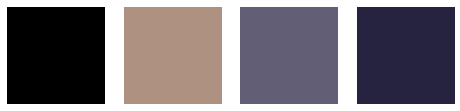

In [63]:
### Visulizing the dominant color
i = 1
plt.figure(0,figsize=(8,2))
color = []
for each_col in centre:
    plt.subplot(1,4,i)
    i += 1
    plt.axis('off')
    color.append(each_col)
    colors = np.zeros((100,100,3),dtype='uint8')
    colors[:,:,:] = each_col
    plt.imshow(colors)
plt.show()

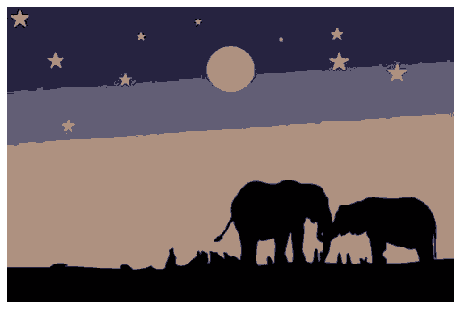

In [64]:
imag = np.zeros((165000,3),dtype='uint8')
for ix in range(165000):
    imag[ix] = color[labels[ix]]
imag = imag.reshape((original))
plt.imshow(imag)
plt.axis("off")
plt.show()

In [65]:
## The colors has been changes acc to the dominant color of that area

In [67]:
## Chane the number of dominant colors
num_of_dominant_colors = 5
Km2 = KMeans(n_clusters = num_of_dominant_colors)
Km2.fit(newImgShape)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
labels = Km2.labels_
centres = Km2.cluster_centers_
print(centres,"\n\n\n")
centre2 = np.array(centres,dtype='uint8')
print(centre2)

[[166.13551653 151.55277832 152.44252592]
 [ 37.93273001  35.19947366  64.38895752]
 [188.32933141 133.22110979  85.75593925]
 [ 97.46305179  94.11765728 117.92314911]
 [  1.49597475   0.83632573   1.15406   ]] 



[[166 151 152]
 [ 37  35  64]
 [188 133  85]
 [ 97  94 117]
 [  1   0   1]]


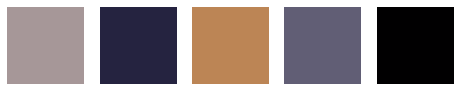

In [74]:
i = 1
plt.figure(0,figsize=(8,2))
color = []
for each_col in centre2:
    plt.subplot(1,5,i)
    i += 1
    plt.axis('off')
    color.append(each_col)
    colors = np.zeros((100,100,3),dtype='uint8')
    colors[:,:,:] = each_col
    plt.imshow(colors)
plt.show()

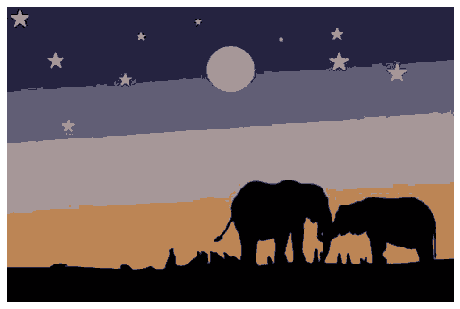

In [75]:
imag2 = np.zeros((165000,3),dtype='uint8')
for ix in range(165000):
    imag2[ix] = color[labels[ix]]
imag2 = imag2.reshape((original))
plt.imshow(imag2)
plt.axis("off")
plt.show()